Dane o pogodzie – czyszczenie i wizualizacja

Cele: praca z rzeczywistym zbiorem danych, czyszczenie, zamiana typów, wykresy trendów.

Dane:
Użyj uproszczonego zbioru pogodowego – np. "GlobalLandTemperaturesByMajorCity.csv"
(plik dostępny w serwisie Kaggle).

Polecenia:
Wczytaj dane o temperaturze dla jednego miasta (np. Warsaw).

Ogranicz dane do okresu 1970–2020, usuń wartości NaN, popraw format dat (pd.to_datetime).

Oblicz średnią roczną temperaturę i narysuj wykres liniowy zmian temperatur w czasie.

Oblicz różnicę między temperaturą średnią z lat 1970–1990 a 2000–2020.

Wyświetl wykres z linią trendu (użyj sns.regplot lub sns.lineplot).

Dodatkowe pytania do refleksji (Markdown):

Czy można zauważyć trend zmian klimatycznych?

Jakie dodatkowe dane można by dołączyć (np. opady, emisje CO₂)?

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')

#wybrany Madrid, nie ma Warsaw w danych
df_Madrid = df[
    (df['City'] == 'Madrid') & (df['dt'].str[:4].astype(int) >= 1970) & (df['dt'].str[:4].astype(int) <= 2020)]
print(df_Madrid.head())

#print(f"Ilosc: {df_Madrid.count()}")
#df_filtered = df.query('dt >= 1970 and dt <= 2020') useful if type matches

df_Madrid = df_Madrid.dropna()
#print(f"Ilosc: {df_Madrid.count()}")

df_Madrid['dt'] = pd.to_datetime(df_Madrid['dt'])

                dt  AverageTemperature  AverageTemperatureUncertainty    City  \
141043  1970-01-01               5.267                          0.265  Madrid   
141044  1970-02-01               4.684                          0.247  Madrid   
141045  1970-03-01               5.013                          0.372  Madrid   
141046  1970-04-01               9.229                          0.651  Madrid   
141047  1970-05-01              13.303                          0.267  Madrid   

       Country Latitude Longitude  
141043   Spain   40.99N     4.26W  
141044   Spain   40.99N     4.26W  
141045   Spain   40.99N     4.26W  
141046   Spain   40.99N     4.26W  
141047   Spain   40.99N     4.26W  


In [70]:
df_Madrid['Year'] = df_Madrid['dt'].dt.year
#df_yearly_avg = df_Madrid.groupby('Year')['AverageTemperature'].mean().round(2)
df_yearly_avg = df_Madrid.groupby('Year').agg({'AverageTemperature': 'mean'}).round(2)
print(df_yearly_avg)

      AverageTemperature
Year                    
1970               11.61
1971               10.83
1972               10.65
1973               11.22
1974               11.07
1975               11.14
1976               11.31
1977               11.30
1978               11.53
1979               11.72
1980               11.42
1981               12.10
1982               12.05
1983               11.98
1984               11.05
1985               12.04
1986               11.65
1987               12.36
1988               11.83
1989               13.04
1990               12.68
1991               11.92
1992               11.89
1993               11.12
1994               12.45
1995               12.99
1996               11.96
1997               13.02
1998               12.40
1999               12.09
2000               12.20
2001               12.33
2002               12.52
2003               12.92
2004               12.17
2005               12.26
2006               13.06
2007               11.89


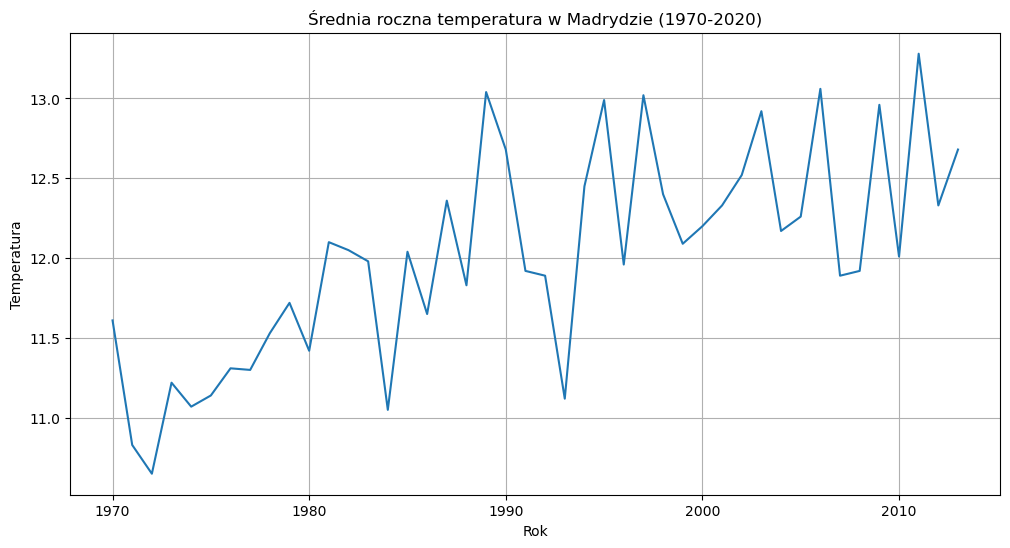

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(df_yearly_avg['AverageTemperature'])
plt.title('Średnia roczna temperatura w Madrydzie (1970-2020)')
plt.xlabel('Rok')
plt.ylabel('Temperatura')
plt.grid(True)
plt.show()

In [72]:
period1 = df_Madrid[df_Madrid['Year'].between(1970, 1990)]["AverageTemperature"].mean()
period2 = df_Madrid[df_Madrid['Year'].between(2000, 2020)]["AverageTemperature"].mean()
diff_period = period2 - period1

print(f"Roznica temperatur pomiedzy 1970-1990 a 2000-2020 to {diff_period.round(2)}")

Roznica temperatur pomiedzy 1970-1990 a 2000-2020 to 0.81


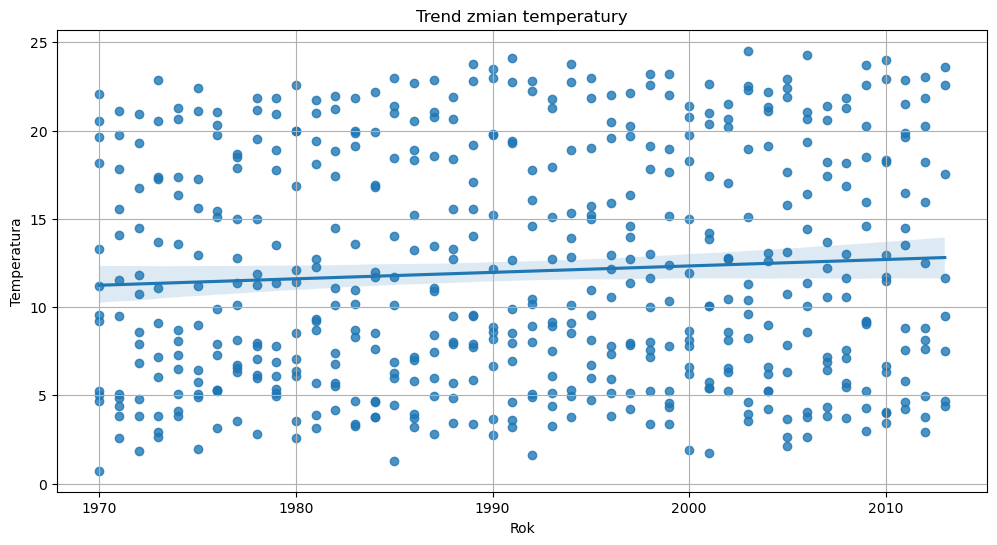

In [76]:
plt.figure(figsize=(12, 6))
sns.regplot(data=df_Madrid, x='Year', y=df_Madrid['AverageTemperature'])
plt.title('Trend zmian temperatury')
plt.xlabel('Rok')
plt.ylabel('Temperatura')
plt.grid(True)
plt.show()

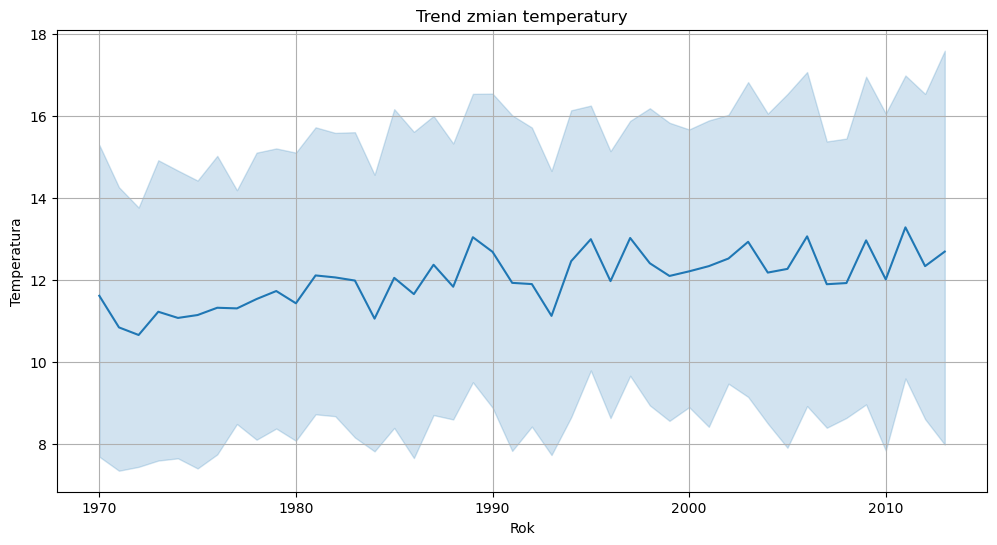

In [77]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_Madrid, x='Year', y=df_Madrid['AverageTemperature'])
plt.title('Trend zmian temperatury')
plt.xlabel('Rok')
plt.ylabel('Temperatura')
plt.grid(True)
plt.show()

Powyższe wykresy wyraźnie pokazują trend zmian klimatycznych (ocieplenie)

Można dołączyć sumę miesięcznych opadów, sumę emisji CO2, średnie ciśnienie atmosferyczne, średnią różnicę pomiędzy najwyższą i najniższą temperaturą